#### Libraries

Import the necessary libraries for the project

In [42]:
import numpy as np
import matplotlib.pyplot as plt

Determine time step and time range variables.

In [43]:
dt = 0.001
t = np.arange(0,1, dt)
l = len(t)

#### Original signals

Plot the sine wave of periodicity of 10 Hz and 50 Hz.

In [44]:
freq1 = 10
freq2 = 50

Reusable function for ploting multiple graphs at once

In [45]:
def multiPlot(*f: object):
    lf = len(f)
    fig, axs = plt.subplots(lf, 1)

    for i in f:
        lf = lf-1
        plt.sca(axs[lf])
        plt.plot(t, i[0], color='navy', linewidth=1, label=i[1], )
        plt.xlim(t[0], t[-1])
        plt.ylabel(i[1])
        plt.legend()

    plt.show()

#### Graphs
Calculate and plot the sine waves and their sum

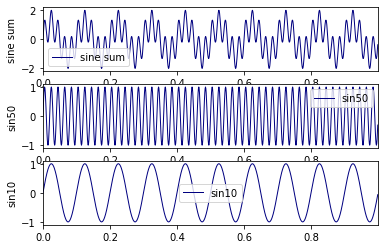

In [46]:
def functFreq10():
    return np.sin(2 * np.pi * freq1 * t), 'sin10'


def functFreq50():
    return np.sin(2 * np.pi * freq2 * t), 'sin50'


def functSumClean():
    return functFreq10()[0] + functFreq50()[0], 'sine sum'

multiPlot(functFreq10(), functFreq50(), functSumClean())

#### Gaussian Noise
Calculate and plot the signal sum with the additional Gaussian noise

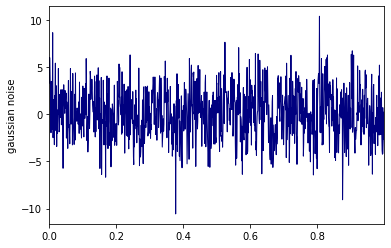

In [47]:
def functSumNoise():
    f = functSumClean()[0]
    f += 2.5 * np.random.randn(l)
    return  f, 'gaussian noise'

def singlePlot(f):
    plt.plot(t, f[0], color='navy', linewidth=1, label=f[1], )
    plt.xlim(t[0], t[-1])
    plt.ylabel(f[1])
    plt.show()

singlePlot(functSumNoise())

#### Fast Fourier Transformation

Find the Fourier series for the noisy signal.

In [48]:
fourier = np.fft.fft(functSumNoise()[0], len(t))

i = 0
for line in fourier:
    if (10 == i):
        break
    print(line)
    i += 1

(-48.405387783748964+0j)
(58.77711754183665+97.21179125970826j)
(37.66286742810697-47.99477158615484j)
(-72.8166854986573-76.58374267075476j)
(3.9945428223619732-43.60041490049273j)
(73.0282313680805-9.691766851022024j)
(16.683525477295987+43.05122207196723j)
(-54.05602061274801-27.101626747650442j)
(-12.511686870332948+20.266140720362806j)
(-111.61872446853657-80.55066867586706j)


#### Power Spectral Density

Calculate the power spectral density for the distorted signal.
Show the power distribution over time range.

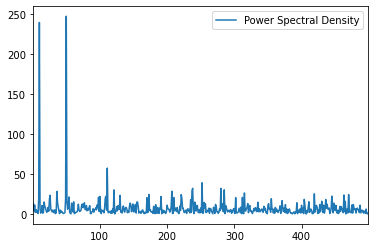

In [49]:
spectrum = fourier * np.conj(fourier)/l

frequencies = (1/(dt*l))* np.arange(l)
L = np.arange(1, np.floor(l/2), dtype='int')

plt.plot(frequencies[L], np.real(spectrum[L]), label='Power Spectral Density')
plt.xlim(frequencies[L[0]], frequencies[L[-1]])
plt.legend()
plt.show()

#### PSD based Filter

Apply the filter to the historgram observations.

Filter the values under 100.

In [50]:
idx = spectrum > 100
new_spectrum = spectrum * idx

Filter the fourier transformation values of the corresponding indices.

In [51]:
filter_fourier = fourier * idx

Thus, there should be only the values left corresponding the chosen picks from PSD.

Finaly, apply inverse fourier transform to the filtered fourier transform series in order to restore the signal.

In [52]:
def filterIfourier():
    ifourier = np.fft.fft(filter_fourier, l)
    return np.real(ifourier)

Plot the resulted inverse fourier to compare optically the resulted signal to the initial one.

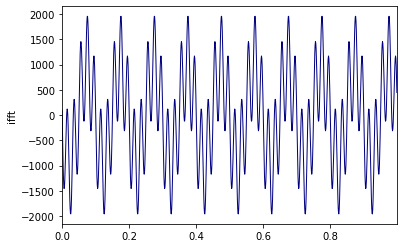

In [53]:
singlePlot((filterIfourier(), 'ifft') )

To compare the resulted inverse fourier transform with the original signal.

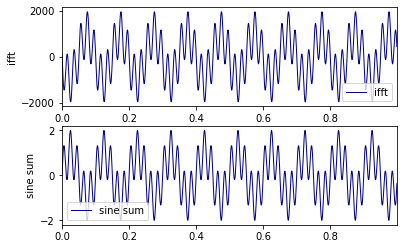

In [54]:
multiPlot(functSumClean(), (filterIfourier(), 'ifft') )

#### Conclusion

After filtering the original signal Fourier Series using Power Spectral Density the significant picks of frequencies
were detected. By choosing those picks and applying inverse fourier transformation algorithm the signal was restored to
its original shape.

#### Nyquist Theorem
#### Abstract

The Nyquist-Shannon theorem states that while the Fourier Transformation the signal can be properly
reconstructed if the sampling performed using at least twice the frequency of the signal.

It means that for a signal sampling of duration T and the maximum frequency w(omega) the resulted minimum values should
be 2Tw.

Otherwise, the "aliasing" effect occurs in case of under-sampling process.

Let's choose a frequency rate of 20 Hz and plot ta cosines function:

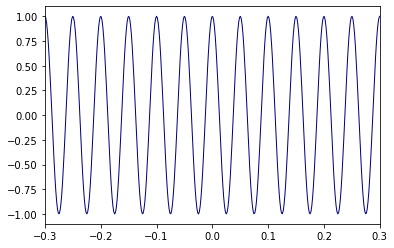

In [55]:
w = 20
tp = 0.3
t = np.linspace(-tp, tp, 400)
fcos = np.cos(2*np.pi*w*t)

def single_signal_plot(time, f):
    plt.plot(time, f, color='navy', linewidth=1, label=f[1], )
    plt.xlim(time[0], time[-1])
    plt.show()

single_signal_plot(t, fcos)

The signal sampled now using the Nyquist-Shannon rate which is 1/(2*w)

In [56]:
Nw = 1/(2*w)

It is necessary to calculate a new time range for the frequency.

In [57]:
min = np.ceil(-tp/Nw)
max = np.floor(tp/Nw)

n = np.arange(min, max)

Plot the sampled signal with Nyquist rate applied.

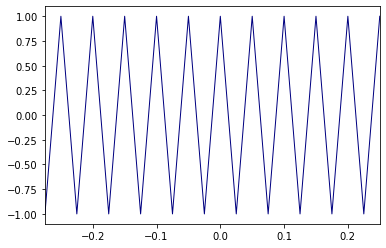

In [58]:
fcosN = np.cos(2 * np.pi * w * Nw * n)

single_signal_plot(n * Nw, fcosN)

It can be observed the resulted signals mimics the original in frequency and amplitude.

We now attempt to sample  the original signal using the rate lower than the one determined by Nyquist-Shannon Theorem.

In [59]:
fLow = 1/25

min = np.ceil(-tp/fLow)
max = np.floor(tp/fLow)

n = np.arange(min, max)

fLowCos = np.cos(2 * np.pi * w * fLow * n)

Plot the undersampled signal accordingly

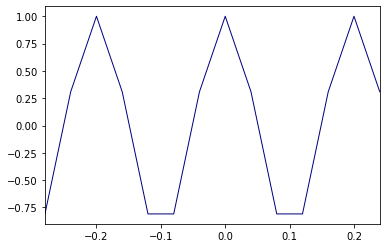

In [60]:
single_signal_plot(n * fLow, fLowCos)

#### Conclusion
Clearly the sampled signal resulted in significant informational losses thus affected by the
principle called aliasing.


### Convolution
Using the previous example fo the distorted signal, lets finds a convolution sum using arbitrary unit impulse value:

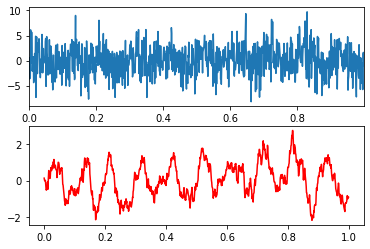

In [61]:
dt = 0.001
t = np.arange(0,1, dt)
l = len(t)

freq1 = 10
freq2 = 50

f1 = np.sin(2 * np.pi * freq1 * t)
f2 = np.sin(2 * np.pi * freq2 * t)

func = f1 + f2
func += 2.5 * np.random.randn(l)

avg = np.ones(20)
avg /= sum(avg)

conv = np.convolve(func, avg, mode='same')

fg, ax = plt.subplots(2, 1)

plt.sca(ax[0])
plt.xlim(t[0], t[-1])
plt.plot(t, func)

plt.sca(ax[1])
plt.plot(t, conv, color='red')

plt.show()

